## Read the Flanks 

In [1]:
import pandas as pd 
df = pd.read_excel("../Covid_analysis_160324/all_snps.xlsx")

In [2]:
df

,POS_Gene,POS,REF,ALT,EFFECT,IMPACT,Gene,HGVS_C,HGVS_P,CDNA_POS,CDS_POS,AA_POS,Product,Start,End,Strand,Virus_Name_merged,Refernce_flank,Alternate_flank
0,29556_ORF10,29556,A,G,upstream_gene_variant,MODIFIER,ORF10,c.-2A>G,NaN,NaN,NaN,NaN,ORF10 protein,29496,29612,+,hCoV-19_Bulgaria_21BG-EU_009543_Pl91_2021,CACAAGGCAGATGGGCT,CACAAGGCGGATGGGCT
1,29614_ORF10,29614,C,T,synonymous_variant,LOW,ORF10,c.57C>T,p.Cys19Cys,57/117,57/117,19/38,ORF10 protein,29520,29636,+,hCoV-19_Spain_PV-HUD-65133896_2021,CTCTTGTGCAGAATGAA,CTCTTGTGTAGAATGAA
2,29621_ORF10,29621,A,T,missense_variant,MODERATE,ORF10,c.64A>T,p.Asn22Tyr,64/117,64/117,22/38,ORF10 protein,29520,29636,+,hCoV-19_India_MH-MCGM-ICMR-INSACOG-WG988_2021,GCAGAATGAATTCTCGT,GCAGAATGTATTCTCGT
3,29642_ORF10,29642,C,T,stop_gained,HIGH,ORF10,c.85C>T,p.Gln29*,85/117,85/117,29/38,ORF10 protein,29514,29630,+,hCoV-19_Lebanon_6444_2021,ACATAGCACAAGTAGAT,ACATAGCATAAGTAGAT
4,29628_ORF10,29628,G,T,missense_variant,MODERATE,ORF10,c.71G>T,p.Arg24Leu,71/117,71/117,24/38,ORF10 protein,29539,29655,+,hCoV-19_India_TN-CBR-SEQ-7547_2021,GAATTCTCGTAACTACA,GAATTCTCTTAACTACA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56966,25380_S,25380,C,A,missense_variant,MODERATE,S,c.3818C>A,p.Thr1273Lys,3818/3822,3818/3822,1273/1273,surface glycoprotein,21524,25345,+,hCoV-19_Brazil_CE-ITV-177785_2021,ACATTACACATAAACGA,ACATTACAAATAAACGA
56967,22607_S,22607,T,A,missense_variant,MODERATE,S,c.1045T>A,p.Ser349Thr,1045/3822,1045/3822,349/1273,surface glycoprotein,21500,25312,+,hCoV-19_BosniaandHerzegovina_AGCOB841_2021,GATTTGCATCTGTTTAT,GATTTGCAACTGTTTAT
56968,22402_S,22402,T,G,missense_variant,MODERATE,S,c.840T>G,p.Asn280Lys,840/3822,840/3822,280/1273,surface glycoprotein,21497,25309,+,hCoV-19_Spain_MD-HULP-060980774_2022,AAATATAATGAAAATGG,AAATATAAGGAAAATGG
56969,23485_S,23485,T,A,missense_variant,MODERATE,S,c.1923T>A,p.Asn641Lys,1923/3822,1923/3822,641/1273,surface glycoprotein,21098,24910,+,hCoV-19_Philippines_PH-PGC-113182_2022,GGTTCTAATGTTTTTCA,GGTTCTAAAGTTTTTCA


In [3]:
df.columns

Index(['POS_Gene', 'POS', 'REF', 'ALT', 'EFFECT', 'IMPACT', 'Gene', 'HGVS_C',
       'HGVS_P', 'CDNA_POS', 'CDS_POS', 'AA_POS', 'Product', 'Start', 'End',
       'Strand', 'Virus_Name_merged', 'Refernce_flank', 'Alternate_flank'],
      dtype='object')

In [4]:
# Check for space in each element of 'col2' and create a new column 'has_space'
#df['has_space'] = df['alt_flanking_regions'].str.contains(' ')
df['has_space'] = df['Alternate_flank'].str.contains(' ')
# Convert boolean values to 'Yes' or 'No'
df['has_space'] = df['has_space'].map({True: 'Yes', False: 'No'})

In [5]:
df['has_space'].unique()

array(['No'], dtype=object)

In [6]:
df.columns

Index(['POS_Gene', 'POS', 'REF', 'ALT', 'EFFECT', 'IMPACT', 'Gene', 'HGVS_C',
       'HGVS_P', 'CDNA_POS', 'CDS_POS', 'AA_POS', 'Product', 'Start', 'End',
       'Strand', 'Virus_Name_merged', 'Refernce_flank', 'Alternate_flank',
       'has_space'],
      dtype='object')

In [7]:
# Unique Key 
# df[df.duplicated(subset=['Seq_id', 'POS', 'REF', 'ALT', 'ref_flanking_regions',
#        'alt_flanking_regions', 'EFFECT', 'IMPACT', 'Gene', 'HGVS_C', 'HGVS_P',
#        'CDNA_POS', 'CDS_POS', 'AA_POS', 'Product', 'Start', 'End', 'Strand',
#        'Virus_Name_merged', 'flank', 'mut_flank', 'Diff_Count_DNA',
#        'Differences_DNA', 'Diff_Pos_DNA', 'WT_aa', 'Mut_aa', 'Diff_Count_aa',
#        'Differences_aa', 'Diff_Pos_aa', 'SNP', 'Universal_ID', 'seq_id',
#        'mut_name', 'esm_score', 'Unnamed: 34'])]

df[df.duplicated(subset=['POS_Gene', 'POS', 'REF', 'ALT', 'EFFECT', 'IMPACT', 'Gene', 'HGVS_C',
       'HGVS_P', 'CDNA_POS', 'CDS_POS', 'AA_POS', 'Product', 'Start', 'End',
       'Strand', 'Virus_Name_merged', 'Refernce_flank', 'Alternate_flank',
       'has_space'])]

,POS_Gene,POS,REF,ALT,EFFECT,IMPACT,Gene,HGVS_C,HGVS_P,CDNA_POS,CDS_POS,AA_POS,Product,Start,End,Strand,Virus_Name_merged,Refernce_flank,Alternate_flank,has_space


In [8]:
df.duplicated

<bound method DataFrame.duplicated of           POS_Gene    POS REF ALT                 EFFECT    IMPACT   Gene  \
0      29556_ORF10  29556   A   G  upstream_gene_variant  MODIFIER  ORF10   
1      29614_ORF10  29614   C   T     synonymous_variant       LOW  ORF10   
2      29621_ORF10  29621   A   T       missense_variant  MODERATE  ORF10   
3      29642_ORF10  29642   C   T            stop_gained      HIGH  ORF10   
4      29628_ORF10  29628   G   T       missense_variant  MODERATE  ORF10   
...            ...    ...  ..  ..                    ...       ...    ...   
56966      25380_S  25380   C   A       missense_variant  MODERATE      S   
56967      22607_S  22607   T   A       missense_variant  MODERATE      S   
56968      22402_S  22402   T   G       missense_variant  MODERATE      S   
56969      23485_S  23485   T   A       missense_variant  MODERATE      S   
56970      22045_S  22045   T   G     synonymous_variant       LOW      S   

          HGVS_C        HGVS_P   CDNA

In [9]:
### Define Kmer Lenght 
kmer_length = 6

In [10]:
#### Install package kaos 
# pip install /home/bernadettem/bernadettenotebook/oligopromotion_wetlab/kaos-0.3-py3-none-any.whl| kaos-0.10-py3-none-any
!pip install /home/bernadettem/bernadettenotebook/Covid_analysis_160324/kaos-0.10-py3-none-any.whl

Processing /home/bernadettem/bernadettenotebook/Covid_analysis_160324/kaos-0.10-py3-none-any.whl
kaos is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


In [24]:
import kaos

In [25]:
kmer_length = 6

In [26]:
contig_length_pad = 50

In [27]:
file_path_covid = "../Covid_analysis_160324/reference_covid_sequence.fasta"

In [28]:
help(kaos.kaos_fcgr)

Help on class kaos_fcgr in module kaos:

class kaos_fcgr(builtins.object)
 |  Methods defined here:
 |  
 |  chaos_frequency_dictionary(self, fasta_string: str, kmer_length: int, chaos_game_kmer_array: <built-in function array> = None, pseudo_count=True)
 |  
 |  chaos_frequency_matrix(self, fasta_string: str, kmer_length: int, chaos_game_kmer_array: <built-in function array> = None, pseudo_count=True)
 |  
 |  chaos_game_representation_key(self, kmer_length: int)
 |  
 |  chaos_probabilistic_frequency_dictionary(self, fasta_string: str, kmer_length: int, chaos_game_kmer_array: <built-in function array> = None, pseudo_count=True)
 |  
 |  find_kmers_indices(self, seq: str, k: int) -> dict[slice(<class 'str'>, list[int], None)]
 |      Function to return all the k-mers in a sequence and their positions
 |  
 |  return_fcgr_matrix(self, fasta_string: str, kmer_length: int, chaos_game_kmer_array: <built-in function array> = None, return_key_matrix: bool = False, pseudo_count=True, return_

In [29]:
fcgr_sequence_covid = kaos.kaos_fcgr().chaos_frequency_dictionary(fasta_string= kaos.Read().read_fasta_removing_non_atgc(file_path_covid), 
                                                    kmer_length=kmer_length,  pseudo_count=True)

In [30]:
fcgr_sequence_covid

{'CCCCCC': 1.0,
 'CCCCCG': 1.0,
 'CCCCGC': 2.0,
 'CCCCGG': 1.0,
 'CCCGCC': 1.0,
 'CCCGCG': 2.0,
 'CCCGGC': 1.0,
 'CCCGGG': 2.0,
 'CCGCCC': 1.0,
 'CCGCCG': 1.0,
 'CCGCGC': 1.0,
 'CCGCGG': 1.0,
 'CCGGCC': 1.0,
 'CCGGCG': 1.0,
 'CCGGGC': 1.0,
 'CCGGGG': 1.0,
 'CGCCCC': 1.0,
 'CGCCCG': 1.0,
 'CGCCGC': 1.0,
 'CGCCGG': 1.0,
 'CGCGCC': 1.0,
 'CGCGCG': 1.0,
 'CGCGGC': 1.0,
 'CGCGGG': 1.0,
 'CGGCCC': 3.0,
 'CGGCCG': 1.0,
 'CGGCGC': 2.0,
 'CGGCGG': 2.0,
 'CGGGCC': 1.0,
 'CGGGCG': 2.0,
 'CGGGGC': 1.0,
 'CGGGGG': 1.0,
 'GCCCCC': 2.0,
 'GCCCCG': 2.0,
 'GCCCGC': 1.0,
 'GCCCGG': 1.0,
 'GCCGCC': 2.0,
 'GCCGCG': 1.0,
 'GCCGGC': 2.0,
 'GCCGGG': 1.0,
 'GCGCCC': 1.0,
 'GCGCCG': 2.0,
 'GCGCGC': 1.0,
 'GCGCGG': 1.0,
 'GCGGCC': 1.0,
 'GCGGCG': 1.0,
 'GCGGGC': 2.0,
 'GCGGGG': 1.0,
 'GGCCCC': 3.0,
 'GGCCCG': 1.0,
 'GGCCGC': 3.0,
 'GGCCGG': 3.0,
 'GGCGCC': 2.0,
 'GGCGCG': 2.0,
 'GGCGGC': 2.0,
 'GGCGGG': 2.0,
 'GGGCCC': 1.0,
 'GGGCCG': 2.0,
 'GGGCGC': 2.0,
 'GGGCGG': 1.0,
 'GGGGCC': 2.0,
 'GGGGCG': 2.0,
 'GGGGGC

In [31]:
#### Save the FCGR file 
import pickle

# Specify the filename for the .pickle file in your working directory (e.g., 'data.pickle')
file_name = '../Covid_analysis_160324/fcgr_sequence_covid.pickle'

# Save the data to a .pickle file in the working directory
with open(file_name, 'wb') as file:
    pickle.dump(fcgr_sequence_covid, file)

print(f"Data saved in {file_name}")

Data saved in /home/bernadettem/bernadettenotebook/Covid_analysis_160324/fcgr_sequence_covid.pickle


In [32]:
#### Load the FCGR 
import pickle

# Specify the filename of the .pickle file
file_name = '../Covid_analysis_160324/fcgr_sequence_covid.pickle'

# Load the data from the .pickle file
with open(file_name, 'rb') as file:
    seq_fcgr = pickle.load(file)

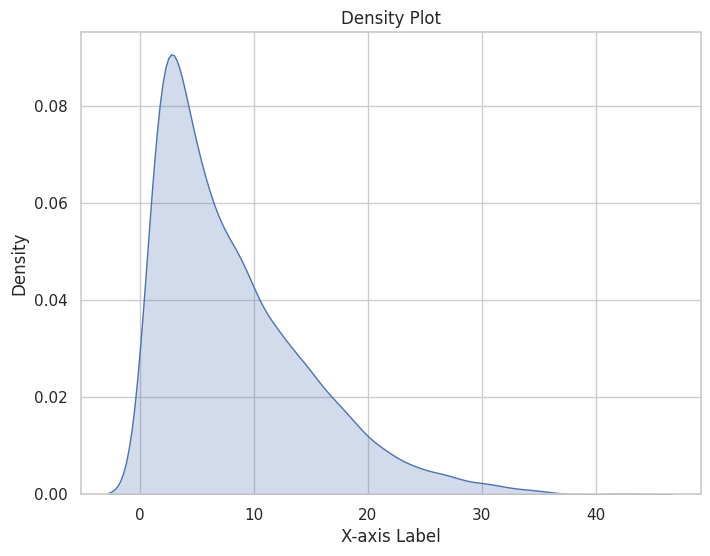

In [33]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from the pickle file
with open('../Covid_analysis_160324/fcgr_sequence_covid.pickle', 'rb') as file:
    data = pickle.load(file)

# Create a density plot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Plot the density plot with fill
sns.kdeplot(data, fill=True)

# Add labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Density')
plt.title('Density Plot')

# Show the plot
plt.show()


## kGain calculation

In [12]:
import numpy as np

In [18]:
df.columns

Index(['POS_Gene', 'POS', 'REF', 'ALT', 'EFFECT', 'IMPACT', 'Gene', 'HGVS_C',
       'HGVS_P', 'CDNA_POS', 'CDS_POS', 'AA_POS', 'Product', 'Start', 'End',
       'Strand', 'Virus_Name_merged', 'Refernce_flank', 'Alternate_flank',
       'has_space'],
      dtype='object')

In [21]:
# Remove rows where length of 'col2' is less than 10 characters
#df_filtered = df.drop(df[df['ref_flanking_regions'].str.len() < 10].index, inplace=True)
df.drop(df[df['Refernce_flank'].str.len() < 10].index, inplace=True)

In [40]:
df.reset_index(drop=True, inplace=True)

In [41]:
df

,POS_Gene,POS,REF,ALT,EFFECT,IMPACT,Gene,HGVS_C,HGVS_P,CDNA_POS,CDS_POS,AA_POS,Product,Start,End,Strand,Virus_Name_merged,Refernce_flank,Alternate_flank,has_space
0,29556_ORF10,29556,A,G,upstream_gene_variant,MODIFIER,ORF10,c.-2A>G,NaN,NaN,NaN,NaN,ORF10 protein,29496,29612,+,hCoV-19_Bulgaria_21BG-EU_009543_Pl91_2021,CACAAGGCAGATGGGCT,CACAAGGCGGATGGGCT,No
1,29614_ORF10,29614,C,T,synonymous_variant,LOW,ORF10,c.57C>T,p.Cys19Cys,57/117,57/117,19/38,ORF10 protein,29520,29636,+,hCoV-19_Spain_PV-HUD-65133896_2021,CTCTTGTGCAGAATGAA,CTCTTGTGTAGAATGAA,No
2,29621_ORF10,29621,A,T,missense_variant,MODERATE,ORF10,c.64A>T,p.Asn22Tyr,64/117,64/117,22/38,ORF10 protein,29520,29636,+,hCoV-19_India_MH-MCGM-ICMR-INSACOG-WG988_2021,GCAGAATGAATTCTCGT,GCAGAATGTATTCTCGT,No
3,29642_ORF10,29642,C,T,stop_gained,HIGH,ORF10,c.85C>T,p.Gln29*,85/117,85/117,29/38,ORF10 protein,29514,29630,+,hCoV-19_Lebanon_6444_2021,ACATAGCACAAGTAGAT,ACATAGCATAAGTAGAT,No
4,29628_ORF10,29628,G,T,missense_variant,MODERATE,ORF10,c.71G>T,p.Arg24Leu,71/117,71/117,24/38,ORF10 protein,29539,29655,+,hCoV-19_India_TN-CBR-SEQ-7547_2021,GAATTCTCGTAACTACA,GAATTCTCTTAACTACA,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56960,25380_S,25380,C,A,missense_variant,MODERATE,S,c.3818C>A,p.Thr1273Lys,3818/3822,3818/3822,1273/1273,surface glycoprotein,21524,25345,+,hCoV-19_Brazil_CE-ITV-177785_2021,ACATTACACATAAACGA,ACATTACAAATAAACGA,No
56961,22607_S,22607,T,A,missense_variant,MODERATE,S,c.1045T>A,p.Ser349Thr,1045/3822,1045/3822,349/1273,surface glycoprotein,21500,25312,+,hCoV-19_BosniaandHerzegovina_AGCOB841_2021,GATTTGCATCTGTTTAT,GATTTGCAACTGTTTAT,No
56962,22402_S,22402,T,G,missense_variant,MODERATE,S,c.840T>G,p.Asn280Lys,840/3822,840/3822,280/1273,surface glycoprotein,21497,25309,+,hCoV-19_Spain_MD-HULP-060980774_2022,AAATATAATGAAAATGG,AAATATAAGGAAAATGG,No
56963,23485_S,23485,T,A,missense_variant,MODERATE,S,c.1923T>A,p.Asn641Lys,1923/3822,1923/3822,641/1273,surface glycoprotein,21098,24910,+,hCoV-19_Philippines_PH-PGC-113182_2022,GGTTCTAATGTTTTTCA,GGTTCTAAAGTTTTTCA,No


In [39]:
# Check for rows with 'Ref' column values less than 10 characters
rows_with_short_ref = df[df['Refernce_flank'].str.len() < 10]

if not rows_with_short_ref.empty:
    print("There are rows with 'Ref' values less than 10 characters:")
    print(rows_with_short_ref)
else:
    print("There are no rows with 'Ref' values less than 10 characters.")


There are no rows with 'Ref' values less than 10 characters.


In [16]:
df.to_csv('../Covid_analysis_160324/covid_df.csv', index=False)

In [42]:
#### Generate gain score
# Gain score 
# df_sliding = pd.DataFrame(columns = ['Seq_id', 'POS', 'REF', 'ALT', 'ref_flanking_regions',
#        'alt_flanking_regions', 'EFFECT', 'IMPACT', 'Gene', 'HGVS_C', 'HGVS_P',
#        'CDNA_POS', 'CDS_POS', 'AA_POS', 'Product', 'Start', 'End', 'Strand',
#        'Virus_Name_merged', 'flank', 'mut_flank', 'Diff_Count_DNA',
#        'Differences_DNA', 'Diff_Pos_DNA', 'WT_aa', 'Mut_aa', 'Diff_Count_aa',
#        'Differences_aa', 'Diff_Pos_aa', 'SNP', 'Universal_ID', 'seq_id',
#        'mut_name', 'esm_score', 'Unnamed: 34', 'has_space'])
# df_complete = pd.DataFrame(columns = ['Seq_id', 'POS', 'REF', 'ALT', 'ref_flanking_regions',
#        'alt_flanking_regions', 'EFFECT', 'IMPACT', 'Gene', 'HGVS_C', 'HGVS_P',
#        'CDNA_POS', 'CDS_POS', 'AA_POS', 'Product', 'Start', 'End', 'Strand',
#        'Virus_Name_merged', 'flank', 'mut_flank', 'Diff_Count_DNA',
#        'Differences_DNA', 'Diff_Pos_DNA', 'WT_aa', 'Mut_aa', 'Diff_Count_aa',
#        'Differences_aa', 'Diff_Pos_aa', 'SNP', 'Universal_ID', 'seq_id',
#        'mut_name', 'esm_score', 'Unnamed: 34', 'has_space'])

df_sliding = pd.DataFrame(columns = ['POS_Gene', 'POS', 'REF', 'ALT', 'EFFECT', 'IMPACT', 'Gene', 'HGVS_C',
       'HGVS_P', 'CDNA_POS', 'CDS_POS', 'AA_POS', 'Product', 'Start', 'End',
       'Strand', 'Virus_Name_merged', 'Refernce_flank', 'Alternate_flank',
       'has_space'])
df_complete = pd.DataFrame(columns = ['POS_Gene', 'POS', 'REF', 'ALT', 'EFFECT', 'IMPACT', 'Gene', 'HGVS_C',
       'HGVS_P', 'CDNA_POS', 'CDS_POS', 'AA_POS', 'Product', 'Start', 'End',
       'Strand', 'Virus_Name_merged', 'Refernce_flank', 'Alternate_flank',
       'has_space'])


for i in range(df.shape[0]):
    
    # ref_seq = df.loc[i, 'ref_flanking_regions']
    # alt_seq = df.loc[i, 'alt_flanking_regions']
    ref_seq = df.loc[i, 'Refernce_flank']
    alt_seq = df.loc[i, 'Alternate_flank']

    
    center_pos = int(len(ref_seq)/2)

    if (df.loc[i, "POS"]<center_pos):
        continue

    if ((len(ref_seq)<(2*kmer_length+1)) | (len(alt_seq)<(2*kmer_length+1))):
        continue


    
    gain = 0
    
#     print(i)
    
    for j in range(kmer_length):

        df_sliding.loc[j, 'altered sliding window'] = alt_seq[center_pos - kmer_length+j+1:center_pos+1+j]
        df_sliding.loc[j, 'reference sliding window'] = ref_seq[center_pos - kmer_length+j+1:center_pos+j+1]

        df_sliding.loc[j, 'gain'] = np.log(fcgr_sequence_covid[df_sliding.loc[j, 'altered sliding window']]/ fcgr_sequence_covid[df_sliding.loc[j, 'reference sliding window']])
    
        gain = gain + df_sliding.loc[j, 'gain']
    
    # df_sliding['Seq_id'] = df.loc[i, 'Seq_id']
    # df_sliding['POS'] = df.loc[i, 'POS']
    # df_sliding['REF'] = df.loc[i, 'REF']
    # df_sliding['ALT'] = df.loc[i, 'ALT']
    # df_sliding['ref_flanking_regions'] = df.loc[i, 'ref_flanking_regions']
    # df_sliding['alt_flanking_regions'] = df.loc[i, 'alt_flanking_regions']
    # df_sliding['EFFECT'] = df.loc[i, 'EFFECT']
    # df_sliding['IMPACT'] = df.loc[i, 'IMPACT']
    # df_sliding['Gene'] = df.loc[i, 'Gene']
    # df_sliding['HGVS_C'] = df.loc[i, 'HGVS_C']
    # df_sliding['HGVS_P'] = df.loc[i, 'HGVS_P']
    # df_sliding['CDNA_POS'] = df.loc[i, 'CDNA_POS']
    # df_sliding['CDS_POS'] = df.loc[i, 'CDS_POS']
    # df_sliding['AA_POS'] = df.loc[i, 'AA_POS']
    # df_sliding['Product'] = df.loc[i, 'Product']
    # df_sliding['Start'] = df.loc[i, 'Start']
    # df_sliding['End'] = df.loc[i, 'End']
    # df_sliding['Strand'] = df.loc[i, 'Strand']
    # df_sliding['Virus_Name_merged'] = df.loc[i, 'Virus_Name_merged']
    # df_sliding['flank'] = df.loc[i, 'flank']
    # df_sliding['mut_flank'] = df.loc[i, 'mut_flank']
    # df_sliding['Diff_Count_DNA'] = df.loc[i, 'Diff_Count_DNA']
    # df_sliding['WT_aa'] = df.loc[i, 'WT_aa']
    # df_sliding['Mut_aa'] = df.loc[i, 'Mut_aa']
    # df_sliding['Diff_Count_aa'] = df.loc[i, 'Diff_Count_aa']
    # df_sliding['Differences_aa'] = df.loc[i, 'Differences_aa']
    # df_sliding['Diff_Pos_aa'] = df.loc[i, 'Diff_Pos_aa']
    # df_sliding['SNP'] = df.loc[i, 'SNP']
    # df_sliding['Universal_ID'] = df.loc[i, 'Universal_ID']
    # df_sliding['seq_id'] = df.loc[i, 'seq_id']
    # df_sliding['mut_name'] = df.loc[i, 'mut_name']
    # df_sliding['esm_score'] = df.loc[i, 'esm_score']
    # df_sliding['Unnamed: 34'] = df.loc[i, 'Unnamed: 34']
    # df_sliding['has_space'] = df.loc[i, 'has_space']
    # df_sliding["accumulated_gain"] = gain
    
    df_sliding['POS_Gene'] = df.loc[i, 'POS_Gene']
    df_sliding['POS'] = df.loc[i, 'POS']
    df_sliding['REF'] = df.loc[i, 'REF']
    df_sliding['ALT'] = df.loc[i, 'ALT']
    df_sliding['EFFECT'] = df.loc[i, 'EFFECT']
    df_sliding['IMPACT'] = df.loc[i, 'IMPACT']
    df_sliding['Gene'] = df.loc[i, 'Gene']
    df_sliding['HGVS_C'] = df.loc[i, 'HGVS_C']
    df_sliding['HGVS_P'] = df.loc[i, 'HGVS_P']
    df_sliding['CDNA_POS'] = df.loc[i, 'CDNA_POS']
    df_sliding['CDS_POS'] = df.loc[i, 'CDS_POS']
    df_sliding['AA_POS'] = df.loc[i, 'AA_POS']
    df_sliding['Product'] = df.loc[i, 'Product']
    df_sliding['Start'] = df.loc[i, 'Start']
    df_sliding['End'] = df.loc[i, 'End']
    df_sliding['Strand'] = df.loc[i, 'Strand']
    df_sliding['Virus_Name_merged'] = df.loc[i, 'Virus_Name_merged']
    df_sliding['Refernce_flank'] = df.loc[i, 'Refernce_flank']
    df_sliding['Alternate_flank'] = df.loc[i, 'Alternate_flank']
    df_sliding['has_space'] = df.loc[i, 'has_space']
    df_sliding["accumulated_gain"] = gain


    df_complete = pd.concat([df_complete, df_sliding])
    
df_complete

,POS_Gene,POS,REF,ALT,EFFECT,IMPACT,Gene,HGVS_C,HGVS_P,CDNA_POS,...,End,Strand,Virus_Name_merged,Refernce_flank,Alternate_flank,has_space,altered sliding window,reference sliding window,gain,accumulated_gain
0,29556_ORF10,29556,A,G,upstream_gene_variant,MODIFIER,ORF10,c.-2A>G,NaN,NaN,...,29612,+,hCoV-19_Bulgaria_21BG-EU_009543_Pl91_2021,CACAAGGCAGATGGGCT,CACAAGGCGGATGGGCT,No,AAGGCG,AAGGCA,-0.405465,-7.783224
1,29556_ORF10,29556,A,G,upstream_gene_variant,MODIFIER,ORF10,c.-2A>G,NaN,NaN,...,29612,+,hCoV-19_Bulgaria_21BG-EU_009543_Pl91_2021,CACAAGGCAGATGGGCT,CACAAGGCGGATGGGCT,No,AGGCGG,AGGCAG,-0.287682,-7.783224
2,29556_ORF10,29556,A,G,upstream_gene_variant,MODIFIER,ORF10,c.-2A>G,NaN,NaN,...,29612,+,hCoV-19_Bulgaria_21BG-EU_009543_Pl91_2021,CACAAGGCAGATGGGCT,CACAAGGCGGATGGGCT,No,GGCGGA,GGCAGA,-2.302585,-7.783224
3,29556_ORF10,29556,A,G,upstream_gene_variant,MODIFIER,ORF10,c.-2A>G,NaN,NaN,...,29612,+,hCoV-19_Bulgaria_21BG-EU_009543_Pl91_2021,CACAAGGCAGATGGGCT,CACAAGGCGGATGGGCT,No,GCGGAT,GCAGAT,-2.484907,-7.783224
4,29556_ORF10,29556,A,G,upstream_gene_variant,MODIFIER,ORF10,c.-2A>G,NaN,NaN,...,29612,+,hCoV-19_Bulgaria_21BG-EU_009543_Pl91_2021,CACAAGGCAGATGGGCT,CACAAGGCGGATGGGCT,No,CGGATG,CAGATG,-1.609438,-7.783224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,22045_S,22045,T,G,synonymous_variant,LOW,S,c.483T>G,p.Ser161Ser,483/3822,...,25343,+,hCoV-19_Austria_CeMM26834_2022,GTTTATTCTAGTGCGAA,GTTTATTCGAGTGCGAA,No,ATTCGA,ATTCTA,-1.673976,-10.717613
2,22045_S,22045,T,G,synonymous_variant,LOW,S,c.483T>G,p.Ser161Ser,483/3822,...,25343,+,hCoV-19_Austria_CeMM26834_2022,GTTTATTCTAGTGCGAA,GTTTATTCGAGTGCGAA,No,TTCGAG,TTCTAG,-2.197225,-10.717613
3,22045_S,22045,T,G,synonymous_variant,LOW,S,c.483T>G,p.Ser161Ser,483/3822,...,25343,+,hCoV-19_Austria_CeMM26834_2022,GTTTATTCTAGTGCGAA,GTTTATTCGAGTGCGAA,No,TCGAGT,TCTAGT,-1.504077,-10.717613
4,22045_S,22045,T,G,synonymous_variant,LOW,S,c.483T>G,p.Ser161Ser,483/3822,...,25343,+,hCoV-19_Austria_CeMM26834_2022,GTTTATTCTAGTGCGAA,GTTTATTCGAGTGCGAA,No,CGAGTG,CTAGTG,-1.299283,-10.717613


In [ ]:
# index_value = 10494
# if index_value in df.index:
#     ref_seq = df.loc[index_value, 'Refernce_flank']
#     alt_seq = df.loc[index_value, 'Alternate_flank']
#     # Further processing...
# else:
#     print(f"Index {index_value} does not exist in the DataFrame.")

Index 10494 does not exist in the DataFrame.


In [43]:
#### Save in local
import pandas as pd
# Assuming you have a data-frame called 'df'
# Path on the local machine where you want to save the data-frame
local_path = "../Covid_analysis_160324/Gain_160324.csv"
# Save the data-frame to a local file
df_complete.to_csv(local_path,index=False)

In [44]:
df_gain = pd.read_csv("../Covid_analysis_160324/Gain_160324.csv")

/tmp/ipykernel_3853606/593032285.py:1: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_gain = pd.read_csv("/home/bernadettem/bernadettenotebook/Covid_analysis_160324/Gain_160324.csv")


In [45]:
df_gain.columns

Index(['POS_Gene', 'POS', 'REF', 'ALT', 'EFFECT', 'IMPACT', 'Gene', 'HGVS_C',
       'HGVS_P', 'CDNA_POS', 'CDS_POS', 'AA_POS', 'Product', 'Start', 'End',
       'Strand', 'Virus_Name_merged', 'Refernce_flank', 'Alternate_flank',
       'has_space', 'altered sliding window', 'reference sliding window',
       'gain', 'accumulated_gain'],
      dtype='object')

In [47]:
# Remove duplicates based on columns 'col2', 'col3', and 'col4'
df2 = df_gain.drop_duplicates(subset=['POS_Gene', 'POS', 'REF', 'ALT', 'EFFECT', 'IMPACT', 'Gene', 'HGVS_C',
       'HGVS_P', 'CDNA_POS', 'CDS_POS', 'AA_POS', 'Product', 'Start', 'End',
       'Strand', 'Virus_Name_merged'])

In [48]:
df2

,POS_Gene,POS,REF,ALT,EFFECT,IMPACT,Gene,HGVS_C,HGVS_P,CDNA_POS,...,End,Strand,Virus_Name_merged,Refernce_flank,Alternate_flank,has_space,altered sliding window,reference sliding window,gain,accumulated_gain
0,29556_ORF10,29556,A,G,upstream_gene_variant,MODIFIER,ORF10,c.-2A>G,NaN,NaN,...,29612,+,hCoV-19_Bulgaria_21BG-EU_009543_Pl91_2021,CACAAGGCAGATGGGCT,CACAAGGCGGATGGGCT,No,AAGGCG,AAGGCA,-0.405465,-7.783224
6,29614_ORF10,29614,C,T,synonymous_variant,LOW,ORF10,c.57C>T,p.Cys19Cys,57/117,...,29636,+,hCoV-19_Spain_PV-HUD-65133896_2021,CTCTTGTGCAGAATGAA,CTCTTGTGTAGAATGAA,No,TTGTGT,TTGTGC,0.382992,1.874647
12,29621_ORF10,29621,A,T,missense_variant,MODERATE,ORF10,c.64A>T,p.Asn22Tyr,64/117,...,29636,+,hCoV-19_India_MH-MCGM-ICMR-INSACOG-WG988_2021,GCAGAATGAATTCTCGT,GCAGAATGTATTCTCGT,No,GAATGT,GAATGA,1.098612,-0.441833
18,29642_ORF10,29642,C,T,stop_gained,HIGH,ORF10,c.85C>T,p.Gln29*,85/117,...,29630,+,hCoV-19_Lebanon_6444_2021,ACATAGCACAAGTAGAT,ACATAGCATAAGTAGAT,No,TAGCAT,TAGCAC,-0.405465,-4.985317
24,29628_ORF10,29628,G,T,missense_variant,MODERATE,ORF10,c.71G>T,p.Arg24Leu,71/117,...,29655,+,hCoV-19_India_TN-CBR-SEQ-7547_2021,GAATTCTCGTAACTACA,GAATTCTCTTAACTACA,No,TTCTCT,TTCTCG,1.299283,4.226022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341616,25380_S,25380,C,A,missense_variant,MODERATE,S,c.3818C>A,p.Thr1273Lys,3818/3822,...,25345.0,+,hCoV-19_Brazil_CE-ITV-177785_2021,ACATTACACATAAACGA,ACATTACAAATAAACGA,No,TTACAA,TTACAC,0.419854,1.882591
341622,22607_S,22607,T,A,missense_variant,MODERATE,S,c.1045T>A,p.Ser349Thr,1045/3822,...,25312.0,+,hCoV-19_BosniaandHerzegovina_AGCOB841_2021,GATTTGCATCTGTTTAT,GATTTGCAACTGTTTAT,No,TTGCAA,TTGCAT,0.893818,4.015805
341628,22402_S,22402,T,G,missense_variant,MODERATE,S,c.840T>G,p.Asn280Lys,840/3822,...,25309.0,+,hCoV-19_Spain_MD-HULP-060980774_2022,AAATATAATGAAAATGG,AAATATAAGGAAAATGG,No,TATAAG,TATAAT,-0.798508,-4.940041
341634,23485_S,23485,T,A,missense_variant,MODERATE,S,c.1923T>A,p.Asn641Lys,1923/3822,...,24910.0,+,hCoV-19_Philippines_PH-PGC-113182_2022,GGTTCTAATGTTTTTCA,GGTTCTAAAGTTTTTCA,No,TCTAAA,TCTAAT,0.810930,-0.203056


In [51]:
#### Save in local
import pandas as pd
# Assuming you have a data-frame called 'df'
# Path on the local machine where you want to save the data-frame
local_path = "../Covid_analysis_160324/Gain_160324_dropduplicates.csv"
# Save the data-frame to a local file
df2.to_csv(local_path,index=False)

In [30]:
# # Split 'col2' based on underscore '_' and extract the second part as 'country'
# df2['country'] = df2['Virus_Name'].str.split('_').str[1]


In [50]:
df2.columns

Index(['POS_Gene', 'POS', 'REF', 'ALT', 'EFFECT', 'IMPACT', 'Gene', 'HGVS_C',
       'HGVS_P', 'CDNA_POS', 'CDS_POS', 'AA_POS', 'Product', 'Start', 'End',
       'Strand', 'Virus_Name_merged', 'Refernce_flank', 'Alternate_flank',
       'has_space', 'altered sliding window', 'reference sliding window',
       'gain', 'accumulated_gain'],
      dtype='object')

In [67]:
df2

,POS_Gene,POS,REF,ALT,EFFECT,IMPACT,Gene,HGVS_C,HGVS_P,CDNA_POS,...,Strand,Virus_Name_merged,Refernce_flank,Alternate_flank,has_space,altered sliding window,reference sliding window,gain,accumulated_gain,Gene_Group
0,29556_ORF10,29556,A,G,upstream_gene_variant,MODIFIER,ORF10,c.-2A>G,NaN,NaN,...,+,hCoV-19_Bulgaria_21BG-EU_009543_Pl91_2021,CACAAGGCAGATGGGCT,CACAAGGCGGATGGGCT,No,AAGGCG,AAGGCA,-0.405465,-7.783224,Accessory
6,29614_ORF10,29614,C,T,synonymous_variant,LOW,ORF10,c.57C>T,p.Cys19Cys,57/117,...,+,hCoV-19_Spain_PV-HUD-65133896_2021,CTCTTGTGCAGAATGAA,CTCTTGTGTAGAATGAA,No,TTGTGT,TTGTGC,0.382992,1.874647,Accessory
12,29621_ORF10,29621,A,T,missense_variant,MODERATE,ORF10,c.64A>T,p.Asn22Tyr,64/117,...,+,hCoV-19_India_MH-MCGM-ICMR-INSACOG-WG988_2021,GCAGAATGAATTCTCGT,GCAGAATGTATTCTCGT,No,GAATGT,GAATGA,1.098612,-0.441833,Accessory
18,29642_ORF10,29642,C,T,stop_gained,HIGH,ORF10,c.85C>T,p.Gln29*,85/117,...,+,hCoV-19_Lebanon_6444_2021,ACATAGCACAAGTAGAT,ACATAGCATAAGTAGAT,No,TAGCAT,TAGCAC,-0.405465,-4.985317,Accessory
24,29628_ORF10,29628,G,T,missense_variant,MODERATE,ORF10,c.71G>T,p.Arg24Leu,71/117,...,+,hCoV-19_India_TN-CBR-SEQ-7547_2021,GAATTCTCGTAACTACA,GAATTCTCTTAACTACA,No,TTCTCT,TTCTCG,1.299283,4.226022,Accessory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341616,25380_S,25380,C,A,missense_variant,MODERATE,S,c.3818C>A,p.Thr1273Lys,3818/3822,...,+,hCoV-19_Brazil_CE-ITV-177785_2021,ACATTACACATAAACGA,ACATTACAAATAAACGA,No,TTACAA,TTACAC,0.419854,1.882591,Structural
341622,22607_S,22607,T,A,missense_variant,MODERATE,S,c.1045T>A,p.Ser349Thr,1045/3822,...,+,hCoV-19_BosniaandHerzegovina_AGCOB841_2021,GATTTGCATCTGTTTAT,GATTTGCAACTGTTTAT,No,TTGCAA,TTGCAT,0.893818,4.015805,Structural
341628,22402_S,22402,T,G,missense_variant,MODERATE,S,c.840T>G,p.Asn280Lys,840/3822,...,+,hCoV-19_Spain_MD-HULP-060980774_2022,AAATATAATGAAAATGG,AAATATAAGGAAAATGG,No,TATAAG,TATAAT,-0.798508,-4.940041,Structural
341634,23485_S,23485,T,A,missense_variant,MODERATE,S,c.1923T>A,p.Asn641Lys,1923/3822,...,+,hCoV-19_Philippines_PH-PGC-113182_2022,GGTTCTAATGTTTTTCA,GGTTCTAAAGTTTTTCA,No,TCTAAA,TCTAAT,0.810930,-0.203056,Structural


In [73]:
import pandas as pd
import re

# Sample DataFrame
df = df2.copy()

# Dictionary mapping three-letter amino acid abbreviations to one-letter codon abbreviations
three_to_one = {
    'Phe': 'F', 'Leu': 'L', 'Ser': 'S', 'Tyr': 'Y', 'Ter': 'X', 'Cys': 'C', 'Trp': 'W',
    'Pro': 'P', 'His': 'H', 'Gln': 'Q', 'Arg': 'R', 'Ile': 'I', 'Met': 'M', 'Thr': 'T',
    'Asn': 'N', 'Lys': 'K', 'Val': 'V', 'Ala': 'A', 'Asp': 'D', 'Glu': 'E', 'Gly': 'G',
    'n/a': 'B', 'n/a': 'Z', "*" :"*"
}

# Function to convert three-letter amino acid abbreviation to one-letter
def convert_to_one_letter(abbreviation):
    return three_to_one.get(abbreviation, abbreviation)

# Function to extract amino acid abbreviation and position, and construct new column
def construct_new_column(row):
    hgvs_p = row['HGVS_P']
    if isinstance(hgvs_p, str):
        match = re.search(r'([A-Za-z]+)(\d+)([A-Za-z]+)', hgvs_p)
        if match:
            amino_acid_before = match.group(1)  # Extract the amino acid abbreviation before the numeric part
            position = match.group(2)  # Extract the numeric part (position)
            amino_acid_after = match.group(3)  # Extract the amino acid abbreviation after the numeric part
            one_letter_before = convert_to_one_letter(amino_acid_before)  # Convert to one-letter amino acid abbreviation
            one_letter_after = convert_to_one_letter(amino_acid_after)  # Convert to one-letter amino acid abbreviation
            return f"{one_letter_before}{position}{one_letter_after}"
    return None

# Apply the function to create the new column
df['HGVS_P_one_letter'] = df.apply(construct_new_column, axis=1)
df


,POS_Gene,POS,REF,ALT,EFFECT,IMPACT,Gene,HGVS_C,HGVS_P,CDNA_POS,...,Virus_Name_merged,Refernce_flank,Alternate_flank,has_space,altered sliding window,reference sliding window,gain,accumulated_gain,Gene_Group,HGVS_P_one_letter
0,29556_ORF10,29556,A,G,upstream_gene_variant,MODIFIER,ORF10,c.-2A>G,NaN,NaN,...,hCoV-19_Bulgaria_21BG-EU_009543_Pl91_2021,CACAAGGCAGATGGGCT,CACAAGGCGGATGGGCT,No,AAGGCG,AAGGCA,-0.405465,-7.783224,Accessory,None
6,29614_ORF10,29614,C,T,synonymous_variant,LOW,ORF10,c.57C>T,p.Cys19Cys,57/117,...,hCoV-19_Spain_PV-HUD-65133896_2021,CTCTTGTGCAGAATGAA,CTCTTGTGTAGAATGAA,No,TTGTGT,TTGTGC,0.382992,1.874647,Accessory,C19C
12,29621_ORF10,29621,A,T,missense_variant,MODERATE,ORF10,c.64A>T,p.Asn22Tyr,64/117,...,hCoV-19_India_MH-MCGM-ICMR-INSACOG-WG988_2021,GCAGAATGAATTCTCGT,GCAGAATGTATTCTCGT,No,GAATGT,GAATGA,1.098612,-0.441833,Accessory,N22Y
18,29642_ORF10,29642,C,T,stop_gained,HIGH,ORF10,c.85C>T,p.Gln29*,85/117,...,hCoV-19_Lebanon_6444_2021,ACATAGCACAAGTAGAT,ACATAGCATAAGTAGAT,No,TAGCAT,TAGCAC,-0.405465,-4.985317,Accessory,None
24,29628_ORF10,29628,G,T,missense_variant,MODERATE,ORF10,c.71G>T,p.Arg24Leu,71/117,...,hCoV-19_India_TN-CBR-SEQ-7547_2021,GAATTCTCGTAACTACA,GAATTCTCTTAACTACA,No,TTCTCT,TTCTCG,1.299283,4.226022,Accessory,R24L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341616,25380_S,25380,C,A,missense_variant,MODERATE,S,c.3818C>A,p.Thr1273Lys,3818/3822,...,hCoV-19_Brazil_CE-ITV-177785_2021,ACATTACACATAAACGA,ACATTACAAATAAACGA,No,TTACAA,TTACAC,0.419854,1.882591,Structural,T1273K
341622,22607_S,22607,T,A,missense_variant,MODERATE,S,c.1045T>A,p.Ser349Thr,1045/3822,...,hCoV-19_BosniaandHerzegovina_AGCOB841_2021,GATTTGCATCTGTTTAT,GATTTGCAACTGTTTAT,No,TTGCAA,TTGCAT,0.893818,4.015805,Structural,S349T
341628,22402_S,22402,T,G,missense_variant,MODERATE,S,c.840T>G,p.Asn280Lys,840/3822,...,hCoV-19_Spain_MD-HULP-060980774_2022,AAATATAATGAAAATGG,AAATATAAGGAAAATGG,No,TATAAG,TATAAT,-0.798508,-4.940041,Structural,N280K
341634,23485_S,23485,T,A,missense_variant,MODERATE,S,c.1923T>A,p.Asn641Lys,1923/3822,...,hCoV-19_Philippines_PH-PGC-113182_2022,GGTTCTAATGTTTTTCA,GGTTCTAAAGTTTTTCA,No,TCTAAA,TCTAAT,0.810930,-0.203056,Structural,N641K


In [41]:
df2

,Seq_id,POS,REF,ALT,ref_flanking_regions,alt_flanking_regions,EFFECT,IMPACT,Gene,HGVS_C,...,seq_id,mut_name,esm_score,Unnamed: 34,has_space,altered sliding window,reference sliding window,gain,accumulated_gain,Gene_Group
0,21618_S,21618,C,G,GTTAATCTTACAACCAGAACT,GTTAATCTTAGAACCAGAACT,missense_variant,MODERATE,S,c.56C>G,...,21618_S,T19R,-5.352085,NaN,No,TCTTAG,TCTTAC,-0.405465,-4.867876,Structural
6,21846_S,21846,C,T,TTTGCTTCCACTGAGAAGTCT,TTTGCTTCCATTGAGAAGTCT,missense_variant,MODERATE,S,c.284C>T,...,21846_S,T95I,-3.793723,NaN,No,TTCCAT,TTCCAC,0.167054,-1.606687,Structural
12,21987_S,21987,G,A,CCATTTTTGGGTGTTTATTAC,CCATTTTTGGATGTTTATTAC,missense_variant,MODERATE,S,c.425G>A,...,21987_S,G142D,-3.717839,NaN,No,TTTGGA,TTTGGG,1.041454,0.294160,Structural
18,22917_S,22917,T,G,TATAATTACCTGTATAGATTG,TATAATTACCGGTATAGATTG,missense_variant,MODERATE,S,c.1355T>G,...,22917_S,L452R,-3.573308,NaN,No,TTACCG,TTACCT,-1.335001,-5.729450,Structural
24,22995_S,22995,C,A,GCCGGTAGCACACCTTGTAAT,GCCGGTAGCAAACCTTGTAAT,missense_variant,MODERATE,S,c.1433C>A,...,22995_S,T478K,-4.124668,NaN,No,TAGCAA,TAGCAC,-0.587787,-1.383791,Structural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132906,2904_ORF1ab,2904,T,A,GATGCTGTCATAAAAACTTTG,GATGCTGTCAAAAAAACTTTG,missense_variant,MODERATE,ORF1ab,c.2639T>A,...,2904_ORF1ab,I880K,-2.676005,NaN,No,TGTCAA,TGTCAT,-0.068993,1.747258,Non-structural
132912,3238_ORF1ab,3238,A,T,TTGGTCAACAAGACGGCAGTG,TTGGTCAACATGACGGCAGTG,missense_variant,MODERATE,ORF1ab,c.2973A>T,...,3238_ORF1ab,Q991H,-5.644265,NaN,No,CAACAT,CAACAA,-0.310155,-1.808778,Non-structural
132918,10661_ORF1ab,10661,A,T,TATTACAGTTAATGTTTTAGC,TATTACAGTTTATGTTTTAGC,missense_variant,MODERATE,ORF1ab,c.10396A>T,...,10661_ORF1ab,N3466Y,-5.379710,NaN,No,CAGTTT,CAGTTA,0.268264,-0.065607,Non-structural
132924,10662_ORF1ab,10662,A,C,ATTACAGTTAATGTTTTAGCT,ATTACAGTTACTGTTTTAGCT,missense_variant,MODERATE,ORF1ab,c.10397A>C,...,10662_ORF1ab,N3466T,-4.053093,NaN,No,AGTTAC,AGTTAA,0.236389,-1.149906,Non-structural
